In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression–
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score


# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display first few rows and dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())




Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

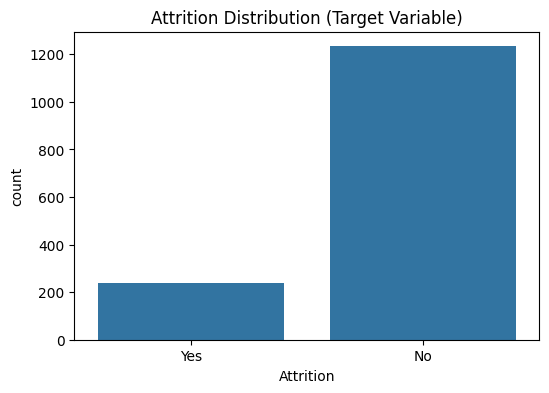

In [ ]:

# 1. Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution (Target Variable)')
plt.show()

In [ ]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [ ]:
# 1. Drop irrelevant columns
# 'Over18' (all 'Y'), 'EmployeeCount' (all 1), 'StandardHours' (all 80) have zero variance.
# 'EmployeeNumber' is just an ID.
df_clean = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'])


In [ ]:
# 2. Encode Target Variable
from sklearn.preprocessing import LabelEncoder
# Encode the target variable
le = LabelEncoder()
df_clean['Attrition'] = le.fit_transform(df_clean['Attrition'])



In [ ]:
# 3. Encode Categorical Features (One-Hot Encoding)
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


In [ ]:
# 4. Define Features (X) and Target (y)
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']


In [ ]:
# 5. Split Data into Train and Test Sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




# 6. Feature Scaling (StandardScaler)
# Logistic Regression performs better when numerical features are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Generate Predictions
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
# Model Evaluation
# --------------------

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.72      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.87      0.88      0.87       441



In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8798185941043084
Precision: 0.725
Recall: 0.4084507042253521
F1 Score: 0.5225225225225225


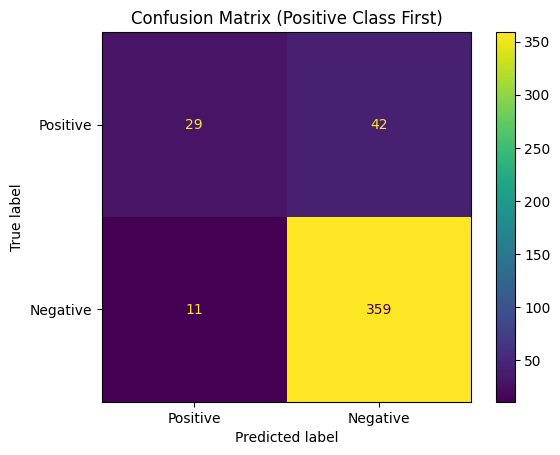

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Positive', 'Negative']
)

disp.plot()
plt.title("Confusion Matrix (Positive Class First)")
plt.show()
